In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
tf.__version__

'1.13.1'

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train=tf.keras.utils.normalize(x_train, axis=1)
#x_test=tf.keras.utils.normalize(x_test, axis=1)
#plt.subplot(221)
#plt.imshow(x_train[0], cmap=plt.cm.binary)

In [4]:
x_train.shape,y_test.shape

((60000, 28, 28), (10000,))

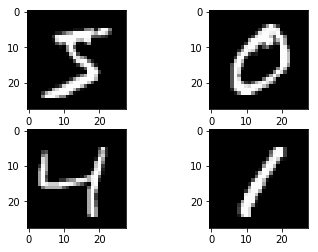

In [5]:
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

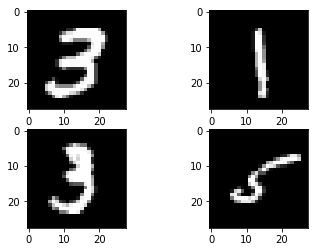

In [6]:
plt.subplot(221)
plt.imshow(x_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[8], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[10], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[11], cmap=plt.get_cmap('gray'))
plt.show()

In [43]:
#from skimage import io

In [8]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

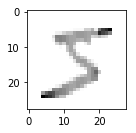

In [9]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.cm.binary)
print(x_train[0])

In [10]:
#ARCHTECTURE OF CNN

model= tf.keras.models.Sequential()
#input layer
model.add(tf.keras.layers.Flatten())
#hidden layer
model.add(tf.keras.layers.Dense(125,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(125,activation=tf.nn.relu))
#output layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [11]:
#parameters for model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2743 - acc: 0.9185
Epoch 2/3
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1097 - acc: 0.9660
Epoch 3/3
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0749 - acc: 0.9763


In [12]:
val_loss, val_acc= model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.0977 - acc: 0.9701
0.09770143393799663 0.9701


In [84]:
model.save('num_reader.model')


In [13]:
new_model = tf.keras.models.load_model('num_reader.model')

In [14]:
predictions =new_model.predict(x_test)
print(predictions)

[[1.09382184e-10 1.94405402e-07 2.97221231e-05 ... 9.99968886e-01
  1.08950449e-08 8.43953296e-10]
 [8.40704857e-08 2.19279518e-05 9.99924183e-01 ... 5.85928181e-11
  6.44964985e-07 4.60023963e-11]
 [1.63210512e-08 9.99813974e-01 7.12311230e-05 ... 4.77042013e-05
  5.11476683e-05 4.94723089e-08]
 ...
 [1.90525734e-10 1.59220906e-06 2.40574764e-07 ... 8.81160813e-05
  5.83543351e-06 3.93083683e-05]
 [1.31370660e-04 1.35737685e-06 1.74922059e-06 ... 3.02752574e-06
  2.42628288e-02 1.86733491e-08]
 [2.53819792e-07 6.12782287e-08 5.13672411e-08 ... 1.69834868e-10
  6.39852999e-07 3.08503090e-09]]


In [15]:
import numpy as np
print(np.argmax(predictions[5999]))

7


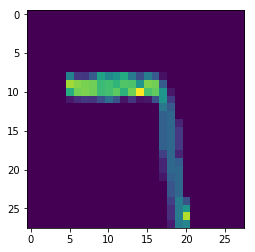

In [16]:
plt.imshow(x_test[5999])
plt.show()